## TSX - Exploring Breakdown of Gender and Ethnicity Classification 

#### Inclusion and Diversity measures - you get done what you measure

#### Let's see how the executive leadership stats from Canada's TSX listed companies stack up for diversity statistics. 

### IMPORT first 2 commands everytime

In [3]:
pip install cufflinks --upgrade

Processing /home/jovyan/.cache/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866/cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#IMPORT PLOTLY
import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# to handle  data retrieval
import urllib3
from urllib3 import request

# to handle certificate verification
import certifi

# to manage json data
import json

In [6]:
#SOURCE: https://medium.com/python-in-plain-english/from-api-to-pandas-getting-json-data-with-python-df127f699b6b
# handle certificate verification and SSL warnings
# https://urllib3.readthedocs.io/en/latest/user-guide.html#ssl
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

In [7]:
#API Key
API_KEY = 'HIDDEN'

## 1) Building the first dataframe for List of Companies in TSX

In [8]:
# get data from the API - for company listings in TSX
url = f'https://financialmodelingprep.com/api/v3/search?query=TO&limit=2000&exchange=TSX&apikey={API_KEY}'

r = http.request('GET', url)
r.status

200

In [11]:
# decode json data into a dict object
data1 = json.loads(r.data.decode('utf-8'))
# data1

# put data in dataframe for pandas
df1 = pd.json_normalize(data1)
df1.tail()
# df.info()

,symbol,name,currency,stockExchange,exchangeShortName
1977,WELL.TO,WELL Health Technologies Corp.,CAD,Toronto,TSX
1978,NHK.TO,Nighthawk Gold Corp.,CAD,Toronto,TSX
1979,AII.TO,Almonty Industries Inc.,CAD,Toronto,TSX
1980,KDSX.V,Kadestone Capital Corp.,CAD,TSXV,TSX
1981,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX


In [39]:
#build list of companies listed in TSX
COMPANIES = list(df1.symbol)
# display(COMPANIES)

## 2) Building the second dataframe for executives for every company in listed companies in TSX

In [ ]:
#THIS WAS TO TRY OUT CODE WITH SMALLER LIST OF COMPANIES
# COMPANIES = ['SU.TO', 'CNQ.TO', 'TRP.TO'] 

In [69]:
# SECOND DATAFRAME - get data from the API - for executives in companies listed in TSX

#initialize empty dataframe
maindf = pd.DataFrame()

for COMPANY in COMPANIES:
    url2 = f'https://financialmodelingprep.com/api/v3/key-executives/{COMPANY}?apikey={API_KEY}'

    r = http.request('GET', url2)
    r.status
    
    # decode json data into a dict object
    data2 = json.loads(r.data.decode('utf-8'))
    
    # put data in dataframe for pandas
    df2 = pd.json_normalize(data2)
    df2['symbol'] = COMPANY #ADD the symbol to the table
#     display(df2)
    
    #Append to a new DF with all executive information
    maindf = maindf.append(df2)

maindf.reset_index()

,index,title,name,pay,currencyPay,gender,yearBorn,titleSince,symbol
0,0,Chairman,Mr. Peter Ufford,67000.0,CAD,male,None,None,WFC.TO
1,1,"Pres, Chief Executive Officer & Director",Mr. Bruno Wall,1010000.0,CAD,male,None,None,WFC.TO
2,2,Vice President of Fin.,Ms. Joanne Liu,343190.0,CAD,female,None,None,WFC.TO
3,3,Pres of Peter Wall Mansion & Estates,Ms. Darcee Wise,226800.0,CAD,female,None,None,WFC.TO
4,4,Director of Construction,Mr. Grant Myles,274000.0,CAD,male,None,None,WFC.TO
...,...,...,...,...,...,...,...,...,...
4082,5,Chief Technology Officer,Mr. Alex Ince-Cushman,NaN,CAD,male,NaN,None,JE.TO
4083,6,Chief Information Officer,Sam Mavalwalla,NaN,CAD,,NaN,None,JE.TO
4084,7,Investor Relations Contact,Mr. Michael Cummings,NaN,CAD,male,NaN,None,JE.TO
4085,8,"Executive Vice President, Gen. Counsel & Corpo...",Mr. Jonah T. Davids,NaN,CAD,male,NaN,None,JE.TO


In [12]:
#Export to CSV file - FILE 1
# maindf.to_csv('maindf_executives.csv')

#Read CSV File
maindf = pd.read_csv('maindf_executives.csv')
maindf = maindf.drop('Unnamed: 0', axis = 1)

In [13]:
#Combine name from first df with maindf
joined_df = pd.merge(df1, maindf, on='symbol', how='inner')
joined_df

,symbol,name_x,currency,stockExchange,exchangeShortName,title,name_y,pay,currencyPay,gender,yearBorn,titleSince
0,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Chairman,Mr. Peter Ufford,67000.0,CAD,male,NaN,NaN
1,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,"Pres, Chief Executive Officer & Director",Mr. Bruno Wall,1010000.0,CAD,male,NaN,NaN
2,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Vice President of Fin.,Ms. Joanne Liu,343190.0,CAD,female,NaN,NaN
3,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Pres of Peter Wall Mansion & Estates,Ms. Darcee Wise,226800.0,CAD,female,NaN,NaN
4,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Director of Construction,Mr. Grant Myles,274000.0,CAD,male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4082,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Technology Officer,Mr. Alex Ince-Cushman,NaN,CAD,male,NaN,NaN
4083,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Information Officer,Sam Mavalwalla,NaN,CAD,NaN,NaN,NaN
4084,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Investor Relations Contact,Mr. Michael Cummings,NaN,CAD,male,NaN,NaN
4085,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,"Executive Vice President, Gen. Counsel & Corpo...",Mr. Jonah T. Davids,NaN,CAD,male,NaN,NaN


## 3) Building the third dataframe for profile of every company in listed companies in TSX

In [207]:
#THIS WAS TO TRY OUT CODE WITH SMALLER LIST OF COMPANIES
# COMPANIES = ['SU.TO', 'CNQ.TO', 'TRP.TO'] 

In [ ]:
# THIRD DATAFRAME - get data from the API - for company profile

#initialize empty dataframe
profiles = pd.DataFrame()
counter = 0

for COMPANY in COMPANIES:
    url3 = f'https://financialmodelingprep.com/api/v3/profile/{COMPANY}?apikey={API_KEY}'

    r = http.request('GET', url3)
    r.status
    
    try:
        # decode json data into a dict object
        data3 = json.loads(r.data.decode('utf-8'))
    except:
        data3 = np.nan
        
    # put data in dataframe for pandas
    df3 = pd.json_normalize(data3)
    df3['symbol'] = COMPANY #ADD the symbol to the table
    counter += 1
    print(counter)
    
    #Append to a new DF with all executive information
    profiles = profiles.append(df3)

profiles.reset_index()

In [54]:
#Export to CSV file - File 2
# profiles.to_csv('company_profiles.csv')

#Read csv file
profiles = pd.read_csv('company_profiles.csv')
profiles = profiles.drop('Unnamed: 0', axis = 1)

In [55]:
profiles.columns.unique()

Index(['symbol', 'price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range',
       'changes', 'companyName', 'currency', 'cik', 'isin', 'cusip',
       'exchange', 'exchangeShortName', 'industry', 'website', 'description',
       'ceo', 'sector', 'country', 'fullTimeEmployees', 'phone', 'address',
       'city', 'state', 'zip', 'dcfDiff', 'dcf', 'image', 'ipoDate',
       'defaultImage'],
      dtype='object')

## 4) Building Out FINAL DF 

In [ ]:
#Combine joined_df and profiles
final_df = pd.merge(joined_df, profiles, on='symbol', how='inner')
final_df = final_df.drop(['price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range',
       'changes', 'companyName','website', 'description', 'ceo','country',
       'fullTimeEmployees', 'phone', 'address','state', 'zip',
       'dcfDiff', 'dcf', 'image', 'ipoDate', 'defaultImage','exchange', 'exchangeShortName_y',
               'isin', 'cusip','currency_y', 'cik','currencyPay','titleSince','yearBorn'], axis = 1)

In [57]:
final_df.tail()

,symbol,name_x,currency_x,stockExchange,exchangeShortName_x,title,name_y,pay,gender,industry,sector,city
4082,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Technology Officer,Mr. Alex Ince-Cushman,NaN,male,Utilities Diversified,Utilities,TORONTO
4083,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Information Officer,Sam Mavalwalla,NaN,NaN,Utilities Diversified,Utilities,TORONTO
4084,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Investor Relations Contact,Mr. Michael Cummings,NaN,male,Utilities Diversified,Utilities,TORONTO
4085,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,"Executive Vice President, Gen. Counsel & Corpo...",Mr. Jonah T. Davids,NaN,male,Utilities Diversified,Utilities,TORONTO
4086,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Senior Vice President of HR,Margaret Munnelly,NaN,NaN,Utilities Diversified,Utilities,TORONTO


In [58]:
# Export to CSV file - File 3
# final_df.to_csv('final_df_executives_tsx.csv')

## 5)Final_df READ IN from CSV - Prepared

In [19]:
#Read in from csv
final_df = pd.read_csv('final_df_executives_tsx.csv')
final_df = final_df.drop(['Unnamed: 0'], axis = 1)
display(final_df)

,symbol,name_x,currency_x,stockExchange,exchangeShortName_x,title,name_y,pay,gender,industry,sector,city
0,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Chairman,Mr. Peter Ufford,67000.0,male,Real Estate Development,Real Estate,Vancouver
1,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,"Pres, Chief Executive Officer & Director",Mr. Bruno Wall,1010000.0,male,Real Estate Development,Real Estate,Vancouver
2,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Vice President of Fin.,Ms. Joanne Liu,343190.0,female,Real Estate Development,Real Estate,Vancouver
3,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Pres of Peter Wall Mansion & Estates,Ms. Darcee Wise,226800.0,female,Real Estate Development,Real Estate,Vancouver
4,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Director of Construction,Mr. Grant Myles,274000.0,male,Real Estate Development,Real Estate,Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...
4082,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Technology Officer,Mr. Alex Ince-Cushman,NaN,male,Utilities Diversified,Utilities,TORONTO
4083,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Chief Information Officer,Sam Mavalwalla,NaN,NaN,Utilities Diversified,Utilities,TORONTO
4084,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,Investor Relations Contact,Mr. Michael Cummings,NaN,male,Utilities Diversified,Utilities,TORONTO
4085,JE.TO,Just Energy Group Inc.,CAD,Toronto,TSX,"Executive Vice President, Gen. Counsel & Corpo...",Mr. Jonah T. Davids,NaN,male,Utilities Diversified,Utilities,TORONTO


In [51]:
#Start visualizing

In [15]:
final_df.gender.unique()

array(['male', 'female', nan], dtype=object)

In [16]:
final_df.industry.unique()

array(['Real Estate Development', 'Asset Management', 'Gold',
       'Biotechnology', 'Household & Personal Products',
       'Oil & Gas Drilling', 'Lumber & Wood Production',
       'Home Improvement Retail', 'Oil & Gas E&P',
       'Oil & Gas Equipment & Services', 'Industrial Distribution',
       'Other Industrial Metals & Mining', 'Engineering & Construction',
       'Packaged Foods', 'Personal Services', 'Auto Parts',
       'Specialty Business Services', 'Beverages Wineries & Distilleries',
       'Farm Products', 'Other Precious Metals & Mining', 'Publishing',
       'Restaurants', 'Software Infrastructure',
       'Drug Manufacturers General Specialty & Generic',
       'Discount Stores', 'Communication Equipment', 'Uranium',
       'Coking Coal', 'Utilities Renewable', 'Copper',
       'Banks Diversified', 'Specialty Retail', 'Electronic Components',
       'Staffing & Employment Services', 'Oil & Gas Midstream',
       'Grocery Stores', 'Building Materials', 'Medical Care Fa

In [61]:
final_df.sector.unique()

array(['Real Estate', 'Financial Services', 'Basic Materials',
       'Healthcare', 'Consumer Defensive', 'Energy', 'Consumer Cyclical',
       'Industrials', 'Communication Services', 'Technology', 'Utilities',
       'Financial'], dtype=object)

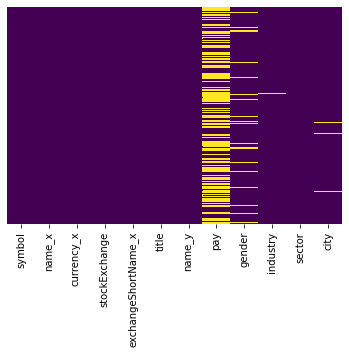

In [4]:
#Heatmap to see what has most info missing (yellow)
sns.heatmap(final_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') 
#check where is null - yellow

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               4087 non-null   object 
 1   name_x               4087 non-null   object 
 2   currency_x           4087 non-null   object 
 3   stockExchange        4087 non-null   object 
 4   exchangeShortName_x  4087 non-null   object 
 5   title                4087 non-null   object 
 6   name_y               4087 non-null   object 
 7   pay                  1989 non-null   float64
 8   gender               3751 non-null   object 
 9   industry             4076 non-null   object 
 10  sector               4087 non-null   object 
 11  city                 4073 non-null   object 
dtypes: float64(1), object(11)
memory usage: 383.3+ KB


### 6) VISUALIZATIONS PER GENDER - Across Industry and Positions

In [ ]:
#NOT AS GOOD CHART AS BELOW - includes gender that are unclassified
plt.figure(figsize=(15, 7))
sns.countplot('sector', hue = 'gender', data = final_df[(final_df['gender'] == 'male') | (final_df['gender'] == 'female') ])

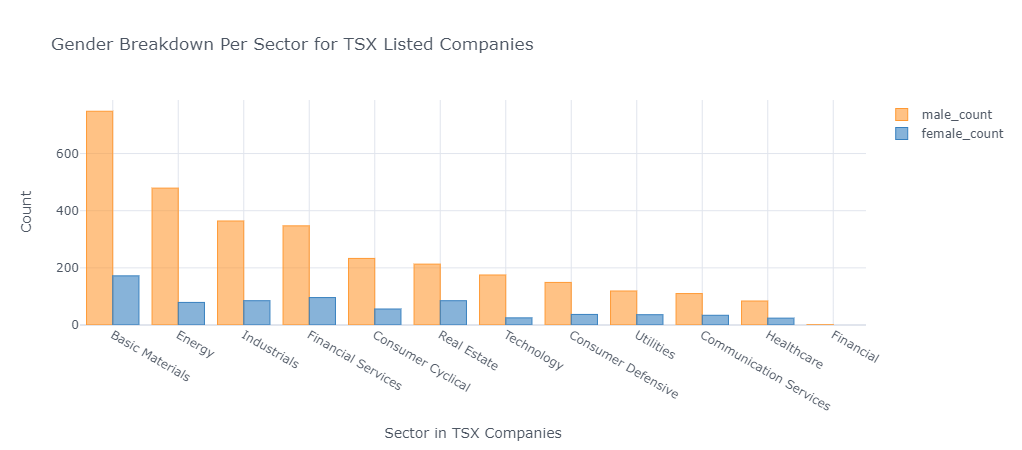

In [5]:
#BETTER INTERACTIVE GROUPED COUNT CHART/BAR CHART

df = pd.DataFrame()
df["male_count"]= final_df[final_df["gender"]=="male"].sector.value_counts()
df["female_count"]= final_df[final_df["gender"]=="female"].sector.value_counts()
df[["male_count","female_count"]].iplot(kind="bar", bins=30, theme="white", title="Gender Breakdown Per Sector for TSX Listed Companies",
         xTitle='Sector in TSX Companies', yTitle='Count')


#### BOXPLOT OF GENDER BREAKDOWN PAY PER SECTOR

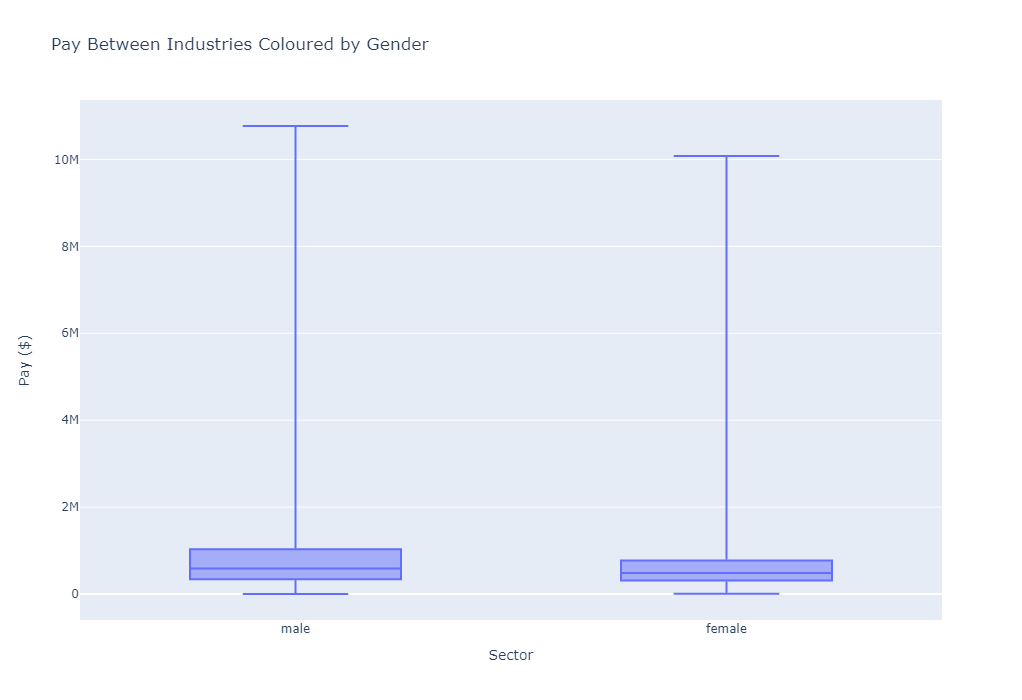

In [21]:
#INTERACTIVE BOXPLOT of pay between Executives - Gender and Female
fig = px.box( final_df[(final_df['gender'] == 'male') | (final_df['gender'] == 'female') ],
             x="gender", y="pay", points = False, height = 700, 
             title = 'Pay Between Industries Coloured by Gender')
fig.update_layout(yaxis_title= 'Pay ($)',
                xaxis_title= 'Sector')
fig.show()

In [ ]:
#BOXPLOT of pay per sector - NOT INTERACTIVE
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x  ='sector', y = 'pay', data = final_df[(final_df['gender'] == 'male') | (final_df['gender'] == 'female') ], hue = 'gender' )
ax.set(ylabel='Pay($)')
plt.show()



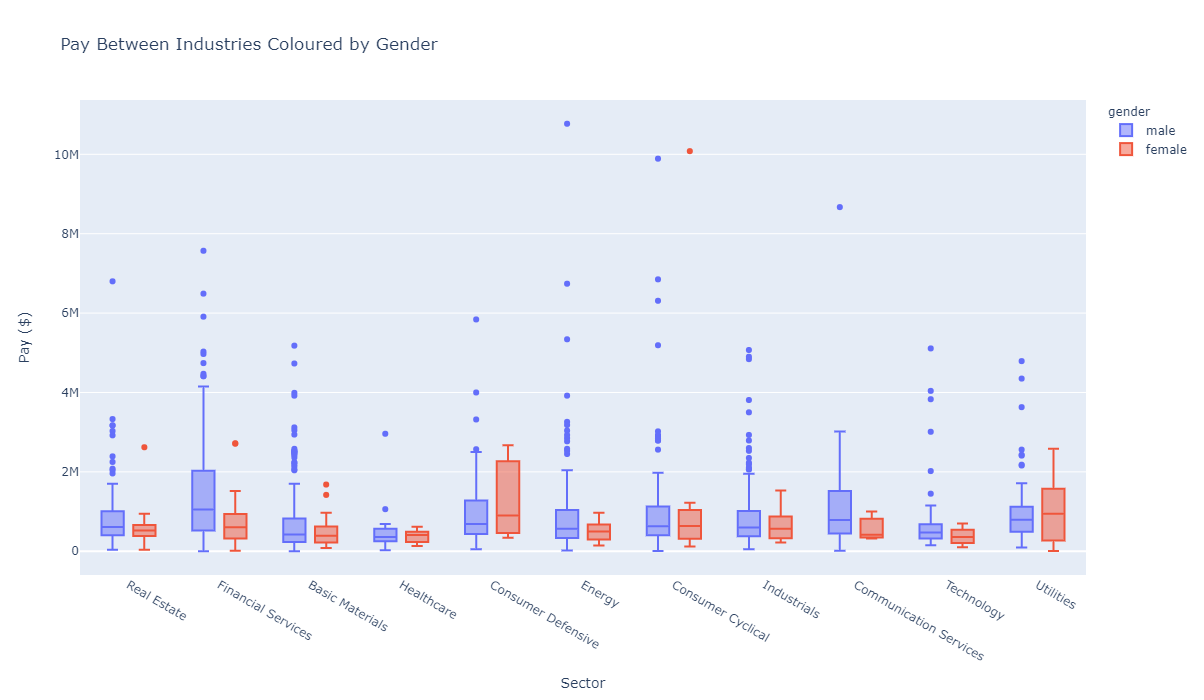

In [12]:
#INTERACTIVE BOXPLOT of pay between Executives
fig = px.box( final_df[(final_df['gender'] == 'male') | (final_df['gender'] == 'female') ],
             x="sector", y="pay", color = 'gender', points = 'outliers', height = 700, 
             title = 'Pay Between Industries Coloured by Gender')
fig.update_layout(yaxis_title= 'Pay ($)',
                xaxis_title= 'Sector')
fig.show()

#### TITLE BREAKDOWNS PER GENDER

In [6]:
#TITLE breakdown - lowercase everything
final_df.title = final_df.title.str.lower()

#Filtering out titles that contain general executive titles
Chairman = final_df[final_df.title.str.contains('chairman')]
Chairman.name = 'Chairman'
CEO = final_df[final_df.title.str.contains('chief executive')]
CEO.name = 'CEO'
VP = final_df[final_df.title.str.contains('vice')]
VP.name = 'VP'
COO = final_df[final_df.title.str.contains('chief operat')]
COO.name = 'COO'
CFO = final_df[final_df.title.str.contains('chief fin')]
CFO.name = 'CFO'
President = final_df[final_df.title.str.contains('pres')]
President.name = "President"
Director = final_df[final_df.title.str.contains('dire')]
Director.name = 'Director'
Founder = final_df[final_df.title.str.contains('founder')]
Founder.name = 'Founder'

In [ ]:
Founder.title.unique()

In [8]:
male_count = Chairman[Chairman.gender == 'male'].gender.count()
male_count

149

In [9]:
#Make new Table
positions = pd.DataFrame(columns = ['title', 'male', 'female'])

#titles df list
df_list = [Chairman, CEO, VP, COO, CFO, President, Director, Founder]


#loop through the df list
counter = 0
for df in df_list:
    male_count = df[df.gender == 'male'].gender.count()
    female_count = df[df.gender == 'female'].gender.count()
#     print(df.name)
#     print(male_count)
#     print(female_count)
    positions = positions.append({'title': df.name, 'male':  male_count, 'female':female_count}, ignore_index=True)
    counter += 1

#make title as index - for plotting with iplot below, sorting by descending of males
positions = positions.set_index('title')
positions = positions.sort_values('male', ascending = False)
# positions = positions.reset_index()

display(positions)

,male,female
title,,
President,1815,438
VP,1261,399
Director,535,88
CEO,524,31
CFO,444,81
COO,205,12
Chairman,149,6
Founder,62,2


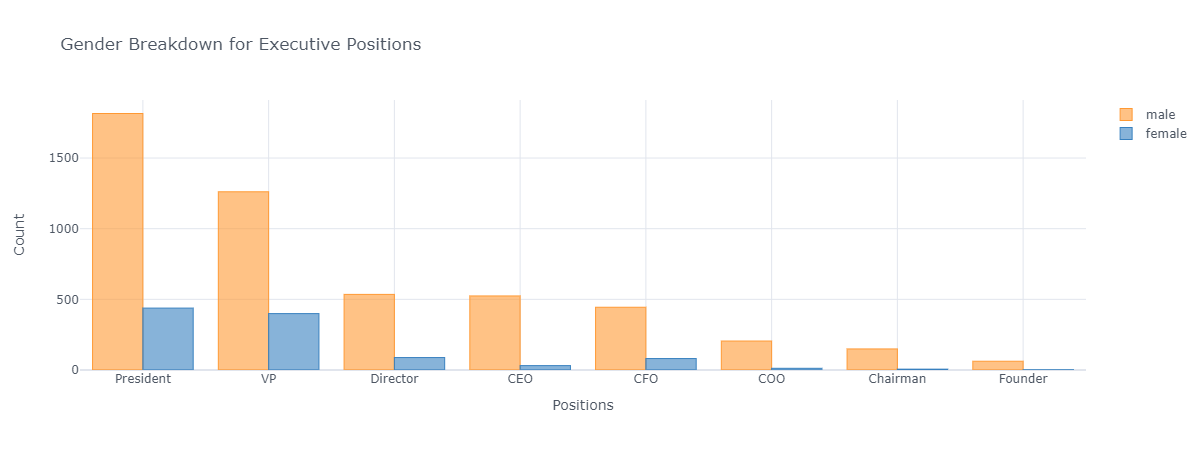

In [10]:
positions.iplot( kind="bar",sortbars = True, bins=30, theme="white", title="Gender Breakdown for Executive Positions",
         xTitle='Positions', yTitle='Count')

### 7) CLEANING THE NAMES - Pre Process to split up first and last names

In [11]:
#Checking data frame name column - make into list
names = list(final_df.name_y)
names[0:5]

['Mr. Peter  Ufford',
 'Mr. Bruno  Wall',
 'Ms. Joanne  Liu',
 'Ms. Darcee  Wise',
 'Mr. Grant  Myles']

In [ ]:
#CREDIT TO: 
#https://stackoverflow.com/questions/59437493/parse-names-into-first-middle-last-when-not-everyone-has-a-middle-name

# Create the dataframe with provided sample data
names = list(final_df.name_y)
symbol = list(final_df.symbol)

exec_names_df = pd.DataFrame(list(zip(names, symbol)), columns =['name', 'symbol']) 
names = exec_names_df['name'].to_list()


# List to fill up given the dataframe content
suffix = ['Mr.', 'Ms.', 'Mrs.', 'Miss']
fancy_credentials = ['M.D.', 'Ph.D.','PhD', 'MPH', 'CPA', 'CMA','P.Eng.','B.Sc' , 'M.Sc.', 'P. Eng.','Dr.',
                    'C.F.A.','CFA', 'CA', 'C.A.','MBA', 'M.A.Sc.', 'B.Com', 'M.B.A.', 'B.Comm.', 'B.A.', 
                    'B.Com.', 'HBComm', 'M.B.A', ' BAPSCI (GEOL)', 'F.C.A.', 'FCPA','L.L.B.',
                     'Q.C.', 'QC',  'AOE', 'm LL.B', 'P.Geo.', 'C.G.A.','C.M.A.','FRCPC.','M.Sc','(Hon)',
                    'FRCP(','BA','Sc.', '(Illinois)','P.E.','BSc', 'PE', 'SME', 'J.D.','F F', 'A F ', 'BCom',
                    'BComm','MS','PGeo','LLB', 'LLD','M.S.M.', 'C.M.','FCPA','FCA','()', 'P Eng','MEng',
                    'M.Eng','B.A.Sc.','BASc','MAcc' , '(De', 'MAcc (De','(Hons)','C Eng','MIMMM']
garbages = [',', '.']

# iterate over all the name in your list
clean_names = []
first_name = []
middle_name = []
last_name = []
title = []
suffix_list = []

# Remove suffix and junk from the names
for name in names:
    to_remove = suffix + garbages +fancy_credentials
    clean_name = name
    for element in to_remove:
        clean_name = clean_name.replace(element, '')
    clean_names.append(clean_name)

# split the clean_names into first middle and last name
for (name,original_name) in zip(clean_names,names):
    data = name.split()

    # error checking for messed up entries
    if len(data) < 2:
        first_name.append("")
        middle_name.append("")
        last_name.append("")
        title.append("")
        print("Entry : " + original_name + " is malformed")
        continue

    # Add the right firstname lastname and middle name structure
    first_name.append(data[0])
    if len(data) == 2:
        middle_name.append("")
        last_name.append(data[1])
    else:
        middle_name.append(data[1])
        last_name.append(" ".join(data[2:]))

    # Add the right title
    title.append(' ,'.join([cred for cred in fancy_credentials if cred in original_name]))
    suffix_list.append(' ,'.join([suf for suf in suffix if suf in original_name]))

exec_names_df['first_name'] = first_name
exec_names_df['middle_name'] = middle_name
exec_names_df['last_name'] = last_name
exec_names_df['title'] = title
exec_names_df['suffix'] = suffix_list


display(exec_names_df[3959:4055])

In [168]:
len(exec_names_df)

4087

In [8]:
# Export to CSV file - File 4
# exec_names_df.to_csv('exec_names_breakdown_df.csv')

#Read from CSV
exec_names_df = pd.read_csv('exec_names_breakdown_df.csv')
exec_names_df.drop(['Unnamed: 0'],axis = 1, inplace = True)
display(exec_names_df)

,name,symbol,first_name,middle_name,last_name,title,suffix
0,Mr. Peter Ufford,WFC.TO,Peter,NaN,Ufford,NaN,Mr.
1,Mr. Bruno Wall,WFC.TO,Bruno,NaN,Wall,NaN,Mr.
2,Ms. Joanne Liu,WFC.TO,Joanne,NaN,Liu,NaN,Ms.
3,Ms. Darcee Wise,WFC.TO,Darcee,NaN,Wise,NaN,Ms.
4,Mr. Grant Myles,WFC.TO,Grant,NaN,Myles,NaN,Mr.
...,...,...,...,...,...,...,...
4082,Mr. Alex Ince-Cushman,JE.TO,Alex,NaN,Ince-Cushman,NaN,Mr.
4083,Sam Mavalwalla,JE.TO,Sam,NaN,Mavalwalla,NaN,NaN
4084,Mr. Michael Cummings,JE.TO,Michael,NaN,Cummings,NaN,Mr.
4085,Mr. Jonah T. Davids,JE.TO,Jonah,T,Davids,NaN,Mr.


### 8) CLASSIFYING ETHNICITY BY NAME

#### This API draw doesn't seem to work

In [16]:
# #Taken from another site - doesn't seem to work
# import requests

# url = "http://www.textmap.com/ethnicity_api/api"
# myobj = {"names" : [ "George Washington", "John Smith", "Barack Obama" ]}

# x = requests.post(url, data = myobj)

# print(x.text)

#### This API works - thanks to NAMSOR

In [25]:
#Using https://github.com/namsor/namsor-python-sdk2
#Done in the terminal below:
pip install git+https://github.com/namsor/namsor-python-sdk2.git

In [24]:
import openapi_client 

#### TRIAL FOR JUST ONE NAME

In [36]:
# #TRIAL FOR JUST ONE NAME

from __future__ import print_function
import time
import openapi_client
from openapi_client.rest import ApiException
from pprint import pprint

# Configure API key authorization: api_key
configuration = openapi_client.Configuration()
configuration.api_key['X-API-KEY'] = 'b07876564b20ecbf21aee452c4e3ca9d'
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# configuration.api_key_prefix['X-API-KEY'] = 'Bearer'

#Dataframe
names_ethnicity_df = pd.DataFrame(columns =['full_name', 'ethnicity']) 

#Ethnicity list
full_name_list = []
ethnicity_list = []

# create an instance of the API class
api_instance = openapi_client.PersonalApi(openapi_client.ApiClient(configuration))
country_iso2 = 'CA' # str | 
first_name = 'Kim' # str | 
last_name = 'Chiu' # str | 
full_name = 'Kim Chiu P Eng'

try:
    # [USES 20 UNITS PER NAME] Infer the likely ethnicity/diaspora of a personal name, given a country of residence ISO2 code (ex. US, CA, AU, NZ etc.)
    api_response = api_instance.diaspora(country_iso2, first_name, last_name)
    pprint(api_response.ethnicity)
    full_name_list.append(full_name)
    ethnicity_list.append(api_response.ethnicity)
except ApiException as e:
    print("Exception when calling PersonalApi->diaspora: %s\n" % e)
    full_name_list.append(full_name)
    ethnicity_list.append('NA')
    
names_ethnicity_df['full_name'] = full_name_list
names_ethnicity_df['ethnicity'] = ethnicity_list

display(names_ethnicity_df)

'Chinese'


,full_name,ethnicity
0,Kim Chiu P Eng,Chinese


### FULL API PULL WITH the 4000 NAMES DATAFRAME

In [37]:
#GRANTED BY NAMSOR WOOHOOOO!

from __future__ import print_function
import time
import openapi_client
from openapi_client.rest import ApiException
from pprint import pprint

# Configure API key authorization: api_key
configuration = openapi_client.Configuration()
configuration.api_key['X-API-KEY'] = 'b07876564b20ecbf21aee452c4e3ca9d'
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# configuration.api_key_prefix['X-API-KEY'] = 'Bearer'


#Dataframe
names_ethnicity_df = pd.DataFrame(columns =['full_name', 'ethnicity']) 

#Ethnicity list
full_name_list = []
ethnicity_list = []

for i in range(0, len(exec_names_df)): #CHANGE THIS TO len(exec_names_df)
    
    # create an instance of the API class
    api_instance = openapi_client.PersonalApi(openapi_client.ApiClient(configuration))
    country_iso2 = 'CA' # str | 
    first_name = exec_names_df.first_name[i] # str | 
    last_name = exec_names_df.last_name[i] # str | 
    full_name = exec_names_df.name[i] # str | 

    try:
        # [USES 20 UNITS PER NAME] Infer the likely ethnicity/diaspora of a personal name, given a country of residence ISO2 code (ex. US, CA, AU, NZ etc.)
        api_response = api_instance.diaspora(country_iso2, first_name, last_name)
        pprint(api_response.ethnicity)
        full_name_list.append(full_name)
        ethnicity_list.append(api_response.ethnicity)
    except ApiException as e:
        print("Exception when calling PersonalApi->diaspora: %s\n" % e)
        full_name_list.append(full_name)
        ethnicity_list.append('NA')
    

names_ethnicity_df['full_name'] = full_name_list
names_ethnicity_df['ethnicity'] = ethnicity_list

display(names_ethnicity_df)

'Irish'
'British'
'Chinese'
'British'
'British'
'Swedish'
'Portuguese'
'German'
'British'
'British'
'Irish'
'Swiss'
'Jewish'
'Irish'
'British'
'British'
'Italian'
'Chinese'
'French'
'French'
'Hispanic'
'Greek'
'British'
'British'
'British'
'British'
'British'
'Irish'
'Jewish'
'Irish'
'French'
'British'
'Jewish'
'Jewish'
'French'
'Irish'
'Italian'
'British'
'French'
'British'
'Irish'
'Italian'
'French'
'British'
'Jewish'
'British'
'British'
'British'
'Swedish'
'British'
'Czech'
'British'
'British'
'British'
'Greek'
'Hungarian'
'German'
'Jewish'
'Chinese'
'Irish'
'German'
'Jewish'
'German'
'Hispanic'
'British'
'British'
'British'
'Italian'
'Norwegian'
'Chinese'
'British'
'British'
'British'
'Jewish'
'Irish'
'British'
'German'
'British'
'British'
'French'
'Jewish'
'Irish'
'French'
'British'
'Irish'
'British'
'British'
'British'
'British'
'British'
'German'
'British'
'Italian'
'British'
'British'
'Irish'
'Indian'
'Irish'
'Irish'
'Jewish'
'Irish'
'British'
'Pakistanese'
'British'
'Italian'


,full_name,ethnicity
0,Mr. Peter Ufford,Irish
1,Mr. Bruno Wall,British
2,Ms. Joanne Liu,Chinese
3,Ms. Darcee Wise,British
4,Mr. Grant Myles,British
...,...,...
4082,Mr. Alex Ince-Cushman,Jewish
4083,Sam Mavalwalla,Indian
4084,Mr. Michael Cummings,British
4085,Mr. Jonah T. Davids,South African


In [5]:
#WRITE TO EXCEL - File 5
# names_ethnicity_df.to_csv('names_ethnicity_df_file5.csv')

#Read from CSV
names_ethnicity_df = pd.read_csv('names_ethnicity_df_file5.csv')

In [6]:
# Make column name of both dataframes match for name

names_ethnicity_df['name'] = names_ethnicity_df['full_name']
names_ethnicity_df.drop(['full_name', 'Unnamed: 0'],axis = 1, inplace = True)
names_ethnicity_df.columns.unique()
display(names_ethnicity_df)

,ethnicity,name
0,Irish,Mr. Peter Ufford
1,British,Mr. Bruno Wall
2,Chinese,Ms. Joanne Liu
3,British,Ms. Darcee Wise
4,British,Mr. Grant Myles
...,...,...
4082,Jewish,Mr. Alex Ince-Cushman
4083,Indian,Sam Mavalwalla
4084,British,Mr. Michael Cummings
4085,South African,Mr. Jonah T. Davids


In [114]:
names_ethnicity_df.name.value_counts()

Ms. Ann P. Wong C.A., C.F.A., C.P.A., B.A., BA, MAcc, CPA, CA, (De    6
Mr. Christopher Z. Cullen C.F.A., M.B.A., BASc, MBA, CFA              6
Mr. John Paul Mulvihill C.F.A., CFA, O.C.                             5
Mr. Kuldip Rai Sahi FCPA, FCGA, FCA                                   4
Ms. Beverley Gail Flynn L.L.B., LLB                                   4
                                                                     ..
Ms. Silvana  Travaglini C.A., CPA                                     1
Mr. Nicolas  Treand                                                   1
Mr. Rakesh  Patel                                                     1
Ms. Kara  Dort                                                        1
Mr. D'Arcy Robert Henderson                                           1
Name: name, Length: 3990, dtype: int64

In [9]:
#Combine names_ethnicity_df and exec_names_df into final_df from above

#first step, into exec_names_df
exec_names_df_2 = pd.merge(exec_names_df, names_ethnicity_df, on='name', how='inner')

In [10]:
display(exec_names_df_2)

,name,symbol,first_name,middle_name,last_name,title,suffix,ethnicity
0,Mr. Peter Ufford,WFC.TO,Peter,NaN,Ufford,NaN,Mr.,Irish
1,Mr. Bruno Wall,WFC.TO,Bruno,NaN,Wall,NaN,Mr.,British
2,Ms. Joanne Liu,WFC.TO,Joanne,NaN,Liu,NaN,Ms.,Chinese
3,Ms. Darcee Wise,WFC.TO,Darcee,NaN,Wise,NaN,Ms.,British
4,Mr. Grant Myles,WFC.TO,Grant,NaN,Myles,NaN,Mr.,British
...,...,...,...,...,...,...,...,...
4356,Mr. Alex Ince-Cushman,JE.TO,Alex,NaN,Ince-Cushman,NaN,Mr.,Jewish
4357,Sam Mavalwalla,JE.TO,Sam,NaN,Mavalwalla,NaN,NaN,Indian
4358,Mr. Michael Cummings,JE.TO,Michael,NaN,Cummings,NaN,Mr.,British
4359,Mr. Jonah T. Davids,JE.TO,Jonah,T,Davids,NaN,Mr.,South African


In [124]:
final_df.columns.unique()

Index(['symbol', 'name_x', 'currency_x', 'stockExchange',
       'exchangeShortName_x', 'title', 'pay', 'gender', 'industry', 'sector',
       'city', 'Executive_Name'],
      dtype='object')

In [11]:
# #SECOND STEP - make name of final_df column same to inner join
final_df['Executive_Name'] = final_df['name_y']
final_df.drop('name_y', axis = 1, inplace = True)


In [12]:
#Change exec_names_df_2 column name to Executive Name
exec_names_df_2['Executive_Name'] = exec_names_df_2['name']
exec_names_df_2.drop('name', axis = 1, inplace = True)

In [14]:
#THIRD step, merge into final_df
final_df2 = pd.merge(final_df, exec_names_df_2, on='Executive_Name', how='inner')

In [129]:
final_df2.Executive_Name.value_counts()

Mr. Christopher Z. Cullen C.F.A., M.B.A., BASc, MBA, CFA              216
Ms. Ann P. Wong C.A., C.F.A., C.P.A., B.A., BA, MAcc, CPA, CA, (De    216
Mr. John Paul Mulvihill C.F.A., CFA, O.C.                             125
Ms. Beverley Gail Flynn L.L.B., LLB                                    64
Mr. Kuldip Rai Sahi FCPA, FCGA, FCA                                    64
                                                                     ... 
Mr. Philip  Armstrong                                                   1
Mr. Brian  Ahlborn                                                      1
Mr. Christopher Mark-Alessandro LeGrow                                  1
Mr. Brian  Wynn                                                         1
Mr. D'Arcy Robert Henderson                                             1
Name: Executive_Name, Length: 3990, dtype: int64

In [16]:
#Some executives are on more than one company. Make a primary key that has company-name and then remove duplicates
final_df2['PK'] = final_df2['symbol_x']+'-'+final_df2['Executive_Name']

In [18]:
final_df2.head()

,symbol_x,name_x,currency_x,stockExchange,exchangeShortName_x,title_x,pay,gender,industry,sector,city,Executive_Name,symbol_y,first_name,middle_name,last_name,title_y,suffix,ethnicity,PK
0,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Chairman,67000.0,male,Real Estate Development,Real Estate,Vancouver,Mr. Peter Ufford,WFC.TO,Peter,NaN,Ufford,NaN,Mr.,Irish,WFC.TO-Mr. Peter Ufford
1,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,"Pres, Chief Executive Officer & Director",1010000.0,male,Real Estate Development,Real Estate,Vancouver,Mr. Bruno Wall,WFC.TO,Bruno,NaN,Wall,NaN,Mr.,British,WFC.TO-Mr. Bruno Wall
2,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Vice President of Fin.,343190.0,female,Real Estate Development,Real Estate,Vancouver,Ms. Joanne Liu,WFC.TO,Joanne,NaN,Liu,NaN,Ms.,Chinese,WFC.TO-Ms. Joanne Liu
3,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Pres of Peter Wall Mansion & Estates,226800.0,female,Real Estate Development,Real Estate,Vancouver,Ms. Darcee Wise,WFC.TO,Darcee,NaN,Wise,NaN,Ms.,British,WFC.TO-Ms. Darcee Wise
4,WFC.TO,Wall Financial Corporation,CAD,Toronto,TSX,Director of Construction,274000.0,male,Real Estate Development,Real Estate,Vancouver,Mr. Grant Myles,WFC.TO,Grant,NaN,Myles,NaN,Mr.,British,WFC.TO-Mr. Grant Myles


In [26]:
# CHECK FOR DUPLICATES - Use drop_duplicates method in the Primary Key PK column

# Approach 1: Simple True/False
boolean = final_df2.duplicated(subset=['PK']).any()
print(boolean, end='\n\n') # True

# First store boolean array, check then remove
duplicate_in_execs = final_df2.duplicated(subset=['PK'])
if duplicate_in_execs.any():
    print(final_df2.loc[~duplicate_in_execs], end='\n\n')

#DROP DUPLICATES
final_df2.drop_duplicates(subset=['PK'], inplace=True)
final_df2.reset_index(inplace = True)
# display(final_df2)

False



In [8]:
final_df2.columns

Index(['index', 'symbol_x', 'name_x', 'currency_x', 'stockExchange',
       'exchangeShortName_x', 'title_x', 'pay', 'gender', 'industry', 'sector',
       'city', 'Executive_Name', 'symbol_y', 'first_name', 'middle_name',
       'last_name', 'title_y', 'suffix', 'ethnicity', 'PK'],
      dtype='object')

### 9) 2020 12 31 - Left off here - Read from CSV to work with FINAL DF2 with Ethnicity Classification

In [6]:
#MAKE INTO EXCEL 
# final_df2.to_csv('final_df2.csv')

# #Read from CSV
final_df2 = pd.read_csv('final_df2.csv')
final_df2.drop(['Unnamed: 0'],axis = 1, inplace = True)
# display(final_df2)


In [9]:
final_df2.ethnicity.nunique()

89

### 10) START VISUALIZATIONS BY ETHNICITY

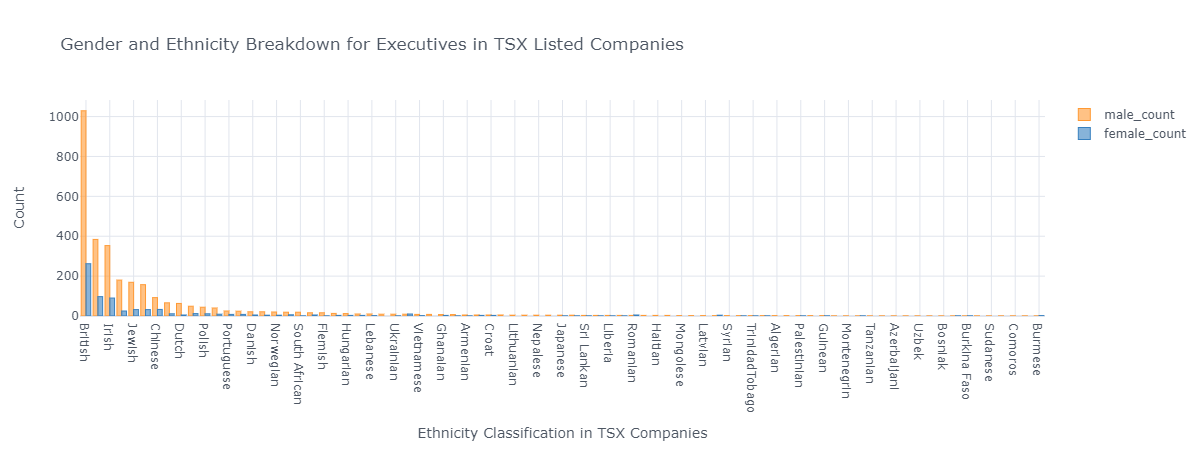

In [10]:
df = pd.DataFrame()
df["male_count"]= final_df2[final_df2["gender"]=="male"].ethnicity.value_counts()
df["female_count"]= final_df2[final_df2["gender"]=="female"].ethnicity.value_counts()
df[["male_count","female_count"]].iplot(kind="bar", bins=30, theme="white", title="Gender and Ethnicity Breakdown for Executives in TSX Listed Companies",
         xTitle='Ethnicity Classification in TSX Companies', yTitle='Count')

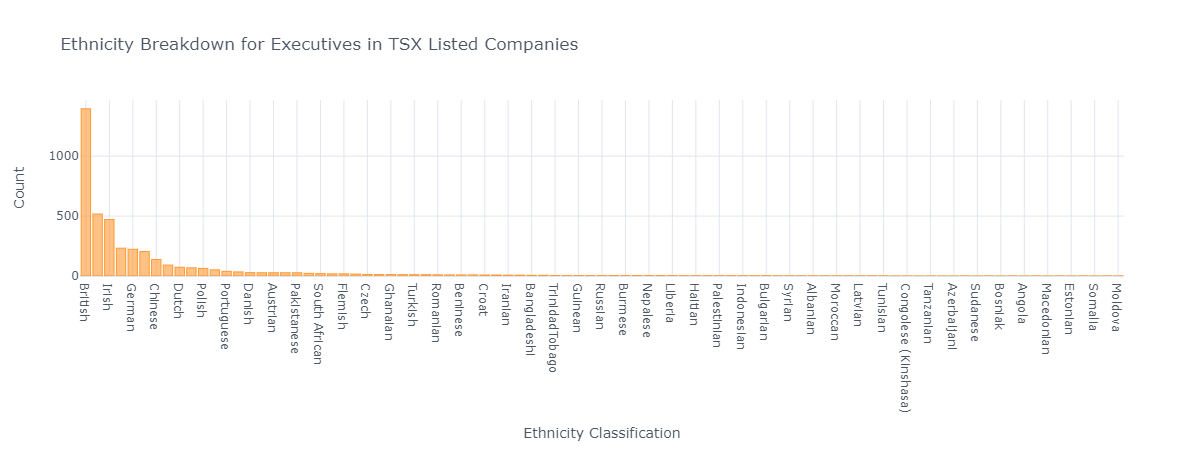

In [11]:
#Ethnicity breakdown of TSX Listed Companies
df = pd.DataFrame(final_df2.ethnicity.value_counts())
df.iplot(kind="bar", bins=30, theme="white", title="Ethnicity Breakdown for Executives in TSX Listed Companies",
         xTitle='Ethnicity Classification', yTitle='Count')

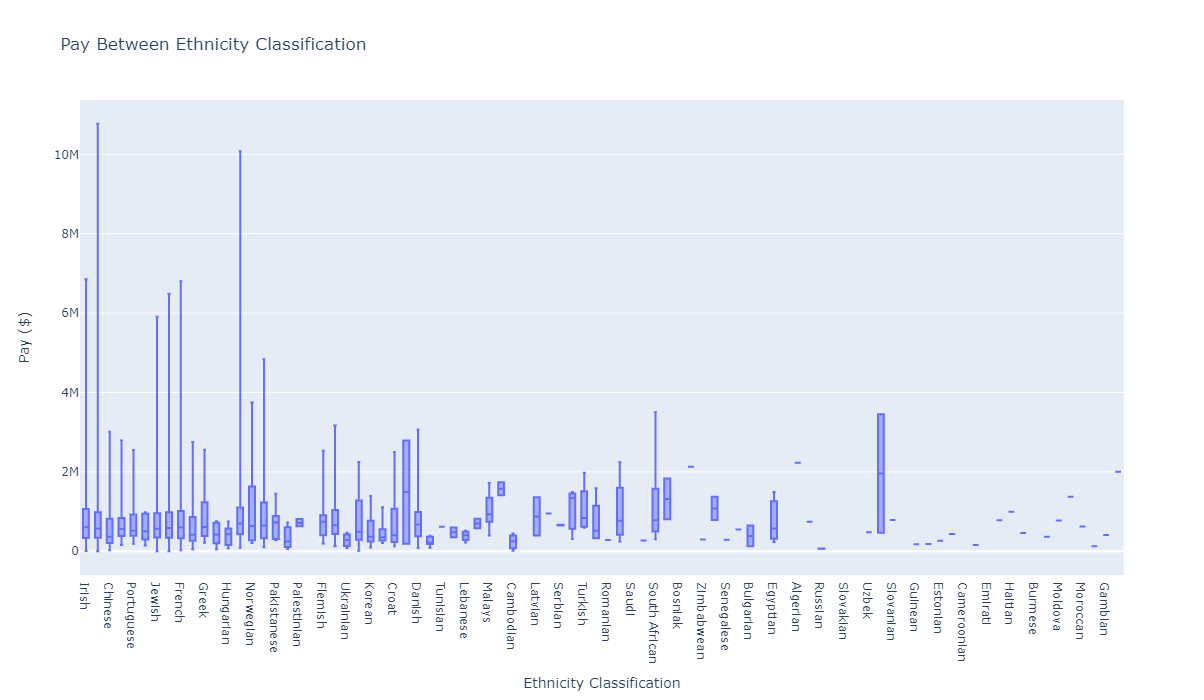

In [14]:
#INTERACTIVE BOXPLOT of pay between Executives - Ethnicity
fig = px.box( final_df2[(final_df2['gender'] == 'male') | (final_df2['gender'] == 'female') ],
             x="ethnicity", y="pay", points = False, 
             height = 700, 
             title = 'Pay Between Ethnicity Classification')
fig.update_layout(yaxis_title= 'Pay ($)',
                xaxis_title= 'Ethnicity Classification')
fig.show()

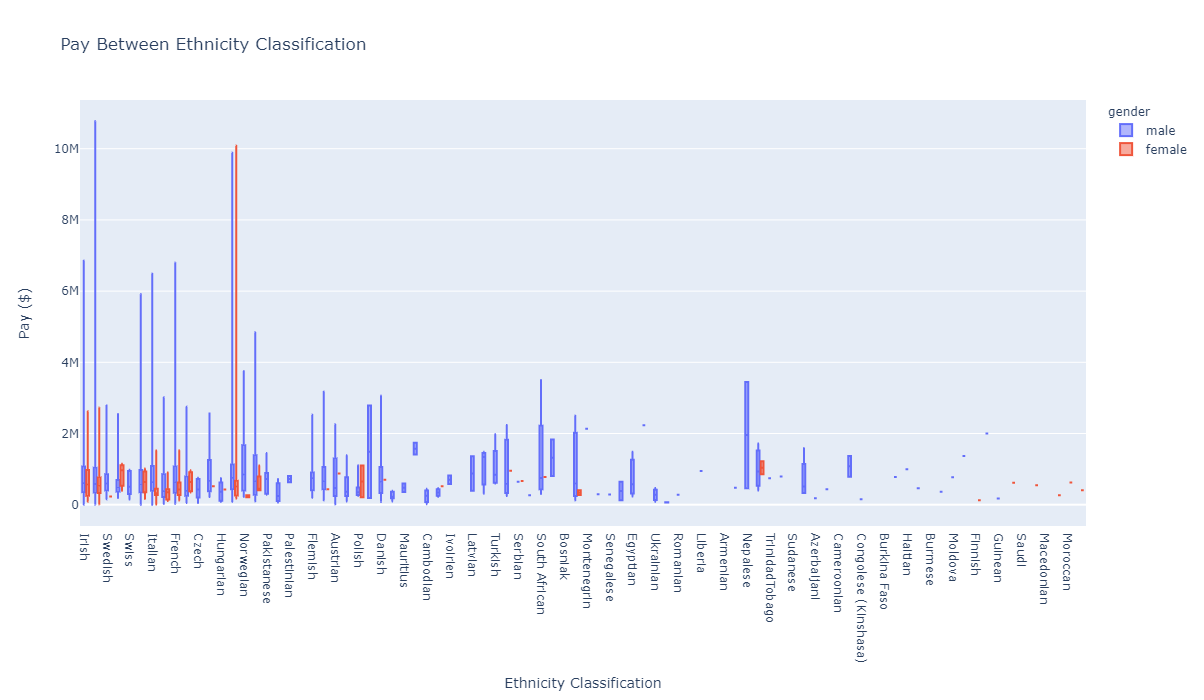

In [13]:
#INTERACTIVE BOXPLOT of pay between Executives - Ethnicity
fig = px.box( final_df2[(final_df2['gender'] == 'male') | (final_df2['gender'] == 'female') ],
             x="ethnicity", y="pay", color = 'gender', points = False, 
             height = 700, 
             title = 'Pay Between Ethnicity Classification')
fig.update_layout(yaxis_title= 'Pay ($)',
                xaxis_title= 'Ethnicity Classification')
fig.show()

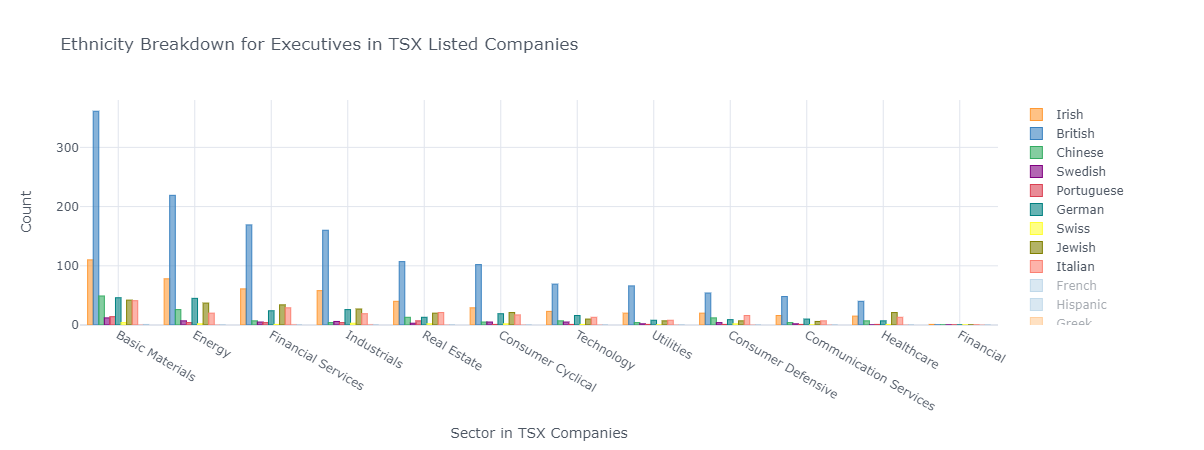

In [60]:
#Count of executives broken down by ethnicity across sectors

df = pd.DataFrame()
for ethnicity in final_df2.ethnicity.unique():
    df[ethnicity] = final_df2[final_df2["ethnicity"]== ethnicity].sector.value_counts()

#Replace NaN with 0 Value
df = df.replace(np.nan, 0)  
df = df.drop(np.nan, axis=1)

#PLOT
df.iplot(kind="bar", bins=20, theme="white", title="Ethnicity Breakdown for Executives in TSX Listed Companies",
         xTitle='Sector in TSX Companies', yTitle='Count')